# Exploratory Data Analysis (EDA)
#### Natural Language Processing Explored

###### Exercises

1. Spam Data

    - a. Load the spam data set.
    - b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    - c. Is there any overlap in the bigrams for the spam data and the ham data?
    - d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.         
    
        
2. Explore the blog articles using the techniques discussed in the exploration lesson.

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
nltk.download('wordnet')

from env import user, password, host, get_db_url
import acquire 
import prepare

***
1. Spam Data

- a. Load the spam data set.
- b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- c. Is there any overlap in the bigrams for the spam data and the ham data?
- d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data. 

In [4]:
# 1.a): Load the spam data set from Codeup's MYSQL server.
# use UDF to access the database. 

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

# establish connection using a string that matched the desired database
url = get_db_url('spam_db')
# specify the query used in acquisition 
sql = "SELECT * FROM spam"

# create the dataframe using both variables
df = pd.read_sql(sql, url, index_col='id')

# check the first 5 rows. 
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [5]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [7]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [8]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [9]:
all_freq.head()

i      2350
to     2240
you    2124
a      1431
the    1322
dtype: int64

In [10]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


In [ ]:
# 1.b): Create and explore bigrams for the spam data. 
#       Visualize them with a word cloud. 
#       How do they compare with the ham bigrams?

In [11]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split())).value_counts()

In [12]:
ham_bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts()

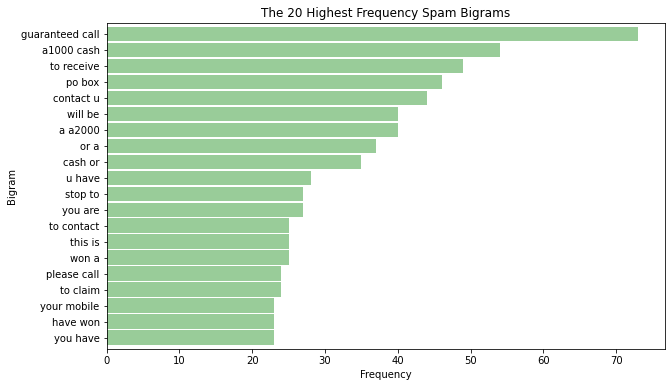

In [17]:
# Visualize the bigrams with barplot
top_20_spam = spam_bigrams.sort_values(ascending=False).head(20)

top_20_spam.sort_values().plot.barh(color='green', alpha=0.4, width=.9, figsize=(10,6))

plt.title('The 20 Highest Frequency Spam Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

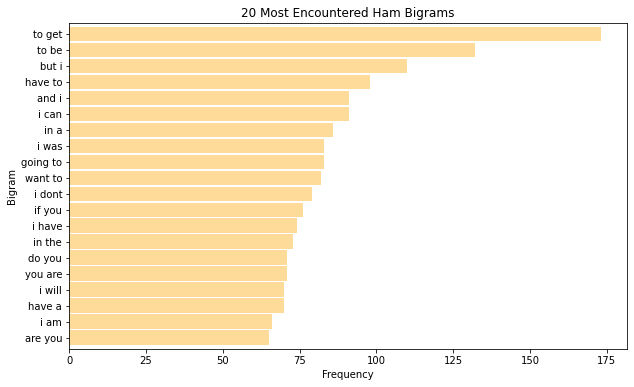

In [18]:
# Visualize the bigrams with barplot
top_20_ham = ham_bigrams.sort_values(ascending=False).head(20)

top_20_ham.sort_values().plot.barh(color='orange', alpha=0.4, width=.9, figsize=(10,6))

plt.title('20 Most Encountered Ham Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

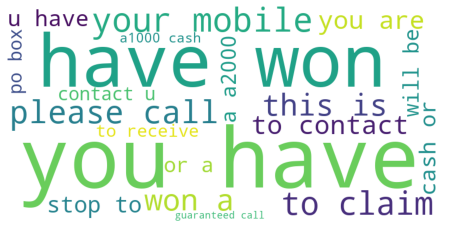

In [21]:
# Visualize spam with wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam.to_dict().items()}
img = WordCloud(background_color='white',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

# Live, Laugh, Love lmao

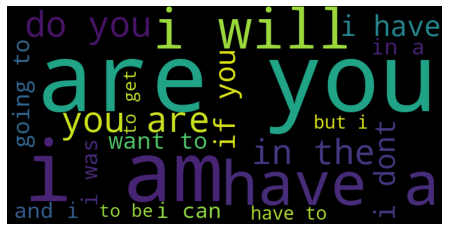

In [22]:
# Visualize ham with wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham.to_dict().items()}
img = WordCloud(background_color='black',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# 1.c): Is there any overlap in the bigrams 
#       for the spam data nd the ham data?

Text(0.5, 1.06, 'Ham vs Spam counts among 20 most frequent words')

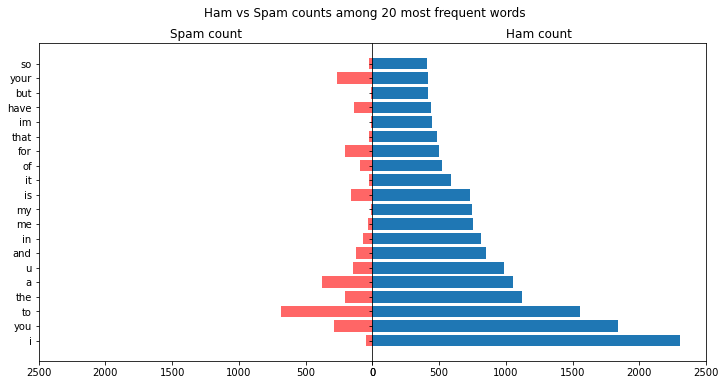

In [25]:
#create fig and subplot
fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()

# data series
s_ham = word_counts.sort_values('ham', ascending=False).head(20)['ham']
s_spam = word_counts.sort_values('ham', ascending=False).head(20)['spam']

# create the charts
axes[0].barh(s_spam.index, s_spam.values, color = 'red', alpha = 0.6)
axes[1].barh(s_ham.index, s_ham.values)

#invert the first axis
axes[0].invert_xaxis()
axes[0].set_xlim(2500, 0)
axes[1].set_xlim(0, 2500)

# set titles
axes[0].set_title('Spam count')
axes[1].set_title('Ham count')

plt.subplots_adjust(wspace=0)
plt.suptitle('Ham vs Spam counts among 20 most frequent words', y = 1.06)

Takeaways:
- Ham messages are typically framed in the first-person. 
- Spam messages are presumably impersonal and are cut-and-dry.
- 'To', 'a', 'you','the', 'your' have the most overlap between the two. 

In [ ]:
# 1.d): Create and explore with trigrams 
#       (i.e. a n-gram with an n of 3) 
#.      for both the spam and ham data. 

In [26]:
#Create the trigrams for ham and spam
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(20))
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(20))


Text(0.5, 0, 'Frequency')

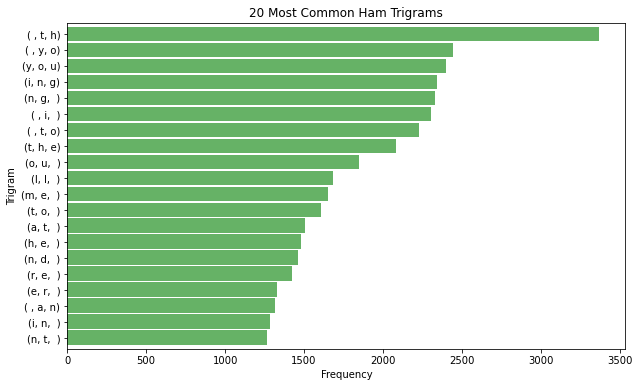

In [29]:
top_20_ham_trigrams.sort_values().plot.barh(color='green', alpha =0.6, width=.9, figsize=(10, 6))

plt.title('20 Most Common Ham Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

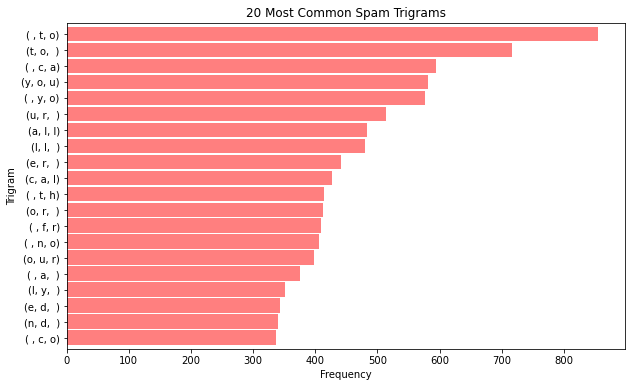

In [30]:
top_20_spam_trigrams.sort_values().plot.barh(color='red', alpha = 0.5, width=.9, figsize=(10, 6))

plt.title('20 Most Common Spam Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')
plt.show()

***
***
2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [2]:
codeup_df = acquire.get_blog_articles()

In [36]:
codeup_df.columns

Index(['title', 'published', 'content'], dtype='object')

In [35]:
#codeup_df
# It's working. 

In [5]:
prepare.prep_article_data(codeup_df, 'content')

title  \
0              Learn to Code: Python Workshop on 4/23   
1                   Coming Soon: Cloud Administration   
2             5 Books Every Woman In Tech Should Read   
3                   Codeup Start Dates for March 2022   
4   VET TEC Funding Now Available For Dallas Veterans   
5       Dallas Campus Re-opens With New Grant Partner   
6   Codeup’s Placement Team Continues Setting Records   
7   IT Certifications 101: Why They Matter, and Wh...   
8   A rise in cyber attacks means opportunities fo...   
9    Use your GI Bill® benefits to Land a Job in Tech   
10  Which program is right for me: Cyber Security ...   
11               What the Heck is System Engineering?   
12     From Speech Pathology to Business Intelligence   
13                      Boris – Behind the Billboards   
14  Is Codeup the Best Bootcamp in San Antonio…or ...   

                                              content  \
0   According to LinkedIn, the “#1 Most Promising ...   
1   We’re launching a new program out of San Anton...   
2   On this International Women’s Day 2022 we want...   
3   As we approach the end of January we wanted to...   
4   We are so happy to announce that VET TEC benef...   
5   We are happy to announce that our Dallas campu...   
6   Our Placement Team is simply defined as a grou...   
7   AWS, Google, Azure, Red Hat, CompTIA…these are...   
8   In the last few months, the US has experienced...   
9   As the end of military service gets closer, ma...   
10  What IT Career should I choose?\nIf you’re thi...   
11  Codeup offers a 13-week training program: Syst...   
12  By: Alicia Gonzalez\nBefore Codeup, I was a ho...   
13                                                      
14  Looking for the best data science bootcamp in ...   

                                                clean  \
0   according linkedin 1 promising job data scienc...   
1   launching new program san antonio acquisition ...   
2   international womens day 2022 wanted tell stor...   
3   approach end january wanted look forward next ...   
4   happy announce vet tec benefits available used...   
5   happy announce dallas campus reopened better y...   
6   placement team simply defined group manages re...   
7   aws google azure red hat comptiathese big name...   
8   last months us experienced dozens major cybera...   
9   end military service gets closer many transiti...   
10  career choose youre thinking career lot direct...   
11  codeup offers 13week training program systems ...   
12  alicia gonzalez codeup home health speechlangu...   
13                                                      
14  looking best data science bootcamp world best ...   

                                              stemmed  \
0   accord linkedin 1 promis job data scienc codeu...   
1   launch new program san antonio acquisit racksp...   
2   thi intern women day 2022 want tell stori wome...   
3   approach end januari want look forward next st...   
4   happi announc vet tec benefit avail use campu ...   
5   happi announc dalla campu reopen better yet ne...   
6   placement team simpli defin group manag relati...   
7   aw googl azur red hat comptiathes big name onl...   
8   last month us ha experienc dozen major cyberat...   
9   end militari servic get closer mani transit se...   
10  career choos think career lot direct could go ...   
11  codeup offer 13week train program system engin...   
12  alicia gonzalez befor codeup wa home health sp...   
13                                                      
14  look best data scienc bootcamp world best code...   

                                           lemmatized  
0   according linkedin 1 promising job data scienc...  
1   launching new program san antonio acquisition ...  
2   international woman day 2022 wanted tell story...  
3   approach end january wanted look forward next ...  
4   happy announce vet tec benefit available used ...  
5   happy announce dallas campus reopened better y...  
6   

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nicholasdougherty/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

***
***
3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [31]:
news_df = acquire.get_news_articles()

In [32]:
news_df

,category,title,content,author,published
0,business,Rupee hits all-time low of 77.42 against US dollar,"The Indian rupee fell to an all-time low of 77.42 against the US dollar on Monday, Reuters reported. Asian markets were lower on Monday as US stock futures fell on fears of more policy tightening from the Federal Reserve and strict lockdown in Shanghai impacting global growth, according to Reuters.",Apaar Sharma,2022-05-09T05:05:31.000Z
1,business,"Bitcoin falls to the lowest level since January, trades below $34,000","Bitcoin fell on Monday to as low as $33,266 in morning trade, nearing January's low of $32,951 as slumping equity markets continued to hurt cryptocurrencies. It then steadied to trade above $33,600. According to BBC, the world's largest cryptocurrency has fallen by 50% since its peak in November 2021.",Pragya Swastik,2022-05-09T09:20:34.000Z
2,business,Rupee closes at all-time low of 77.50 against US dollar,"The Indian rupee weakened further on Monday to close at a new all-time low of 77.50 against the US dollar, 60 paise over its previous close. During the trading session, the rupee touched its lifetime low of 77.52. The currency was weighed down by elevated crude oil prices and a widening trade deficit.",Pragya Swastik,2022-05-09T15:27:43.000Z
3,business,Made best possible decision: IndiGo on barring differently-abled child from flight,"IndiGo's CEO Ronojoy Dutta said the airline made ""the best possible decision"" by barring a differently-abled teenager and his family from boarding a Ranchi-Hyderabad flight. ""At boarding area, the teenager was visibly in panic...the airport staff, in line with safety guidelines, were forced to make a difficult decision,"" Dutta said. IndiGo offered to purchase an electric wheelchair for the child.",Pragya Swastik,2022-05-09T09:50:34.000Z
4,business,India's biggest IPO of LIC subscribed nearly 3 times on final day of bidding,"LIC's IPO, India's biggest IPO which opened on May 4 and closed on May 9, was subscribed 2.95 times on Monday. Expected to raise ₹20,557 crore, the IPO received bids for 47.83 crore equity shares against the IPO size of 16.2 crore shares. The policyholders' portion was subscribed 6.11 times, employees bid 4.39 times and retail investors bid 1.99 times.\n\n",Pragya Swastik,2022-05-09T14:10:38.000Z
...,...,...,...,...,...
94,entertainment,"People taunted me for not getting pregnant, tried IVF: Sambhavna","Actress Sambhavna Seth has revealed that she has been taunted and age-shamed for not being able to get pregnant even after many years of marriage. Sambhavna and her husband Avinash Dwivedi got married in 2016. ""IVF is one of the ways. Some people might know about it, some might not. We have tried it four times and failed,"" Sambhavna said.",Kriti Kambiri,2022-05-09T11:42:26.000Z
95,entertainment,He's done right thing: Neetu on Ranbir not being on social media,"Actress Neetu Kapoor has said that her son Ranbir Kapoor has done the right thing by not being on any social media platforms. Neetu further said that earlier fans had a craze for celebrities and their personal lives and the urge to see them onscreen was high. Now actors post regular updates and have become way more accessible, she added.",Kriti Kambiri,2022-05-09T15:09:18.000Z
96,entertainment,"Nimrat Kaur shares pic of tattoo, says got it for mom with sister","Actress Nimrat Kaur shared a series of pictures on Instagram showing off her wrist tattoo on Sunday to mark Mother's Day. The actress wrote that she got the tattoo along with her sister Ruby five years ago to celebrate their bond with their mother. ""The idea of an infinity knot symbolising Mama...protecting me and Ruby with her love,"" Nimrat wrote.",Kriti Kambiri,2022-05-09T15:23:03.000Z
97,entertainment,Was worried about being written off due to my South Indian accent: Deepika,"Actress Deepika Padukone said that her South Indian accent was frowned upon and that she was initially worried about being written off. ""As an outsider to the i